In [161]:
import numpy as np
# import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import sys
from sklearn.model_selection import ParameterGrid
import gzip
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree

In [162]:
R0 = 2.5
r = 0.025

In [151]:
p = r/(R0+r)
p_prime = 1-p
aa = torch.distributions.negative_binomial.NegativeBinomial(r,p_prime).sample(sample_shape=torch.Size([100000]))
tt3 = SSA.nbinom.rvs(r, p, size=100000, random_state=None)
x = np.arange(SSA.nbinom.ppf(0.001, r, p),
              SSA.nbinom.ppf(0.990, r, p))  # define the range of x values
pmf = SSA.nbinom.pmf(x, r, p)  # calculate the probability mass function

In [152]:
# %%timeit
x_cutoff = 100
p = r/(R0+r)
weights = np.zeros(x_cutoff)
for i in range(x_cutoff):
    temp1=SS.gamma(r+i)/(SS.gamma(r)*SS.gamma((i+1)))*np.power(p,r)*np.power((1-p),i)
    weights[i] = temp1
weights_n = weights/np.sum(weights)
tt1 = np.random.choice(len(weights_n), size = 100000 , p=weights_n)

(-1.0, 10.0)

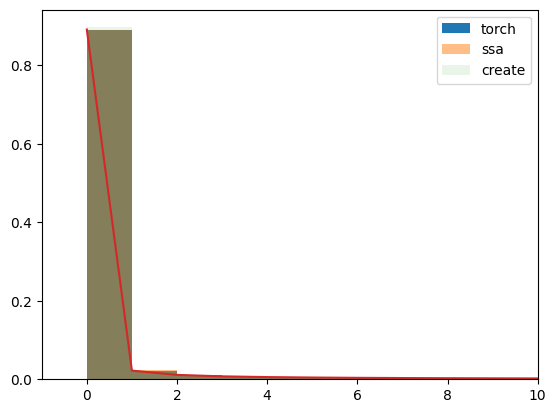

In [158]:
plt.hist(np.array(aa),density=True,bins=aa.max().int(),label='torch')
plt.hist(tt3,density=True,alpha=0.5,bins=np.max(tt3),label='ssa')
plt.hist(tt1,density=True,alpha=0.1,bins=np.max(tt1),label='create')
plt.plot(pmf)
plt.legend()
plt.xlim((-1,10))

(-0.001, 0.02)

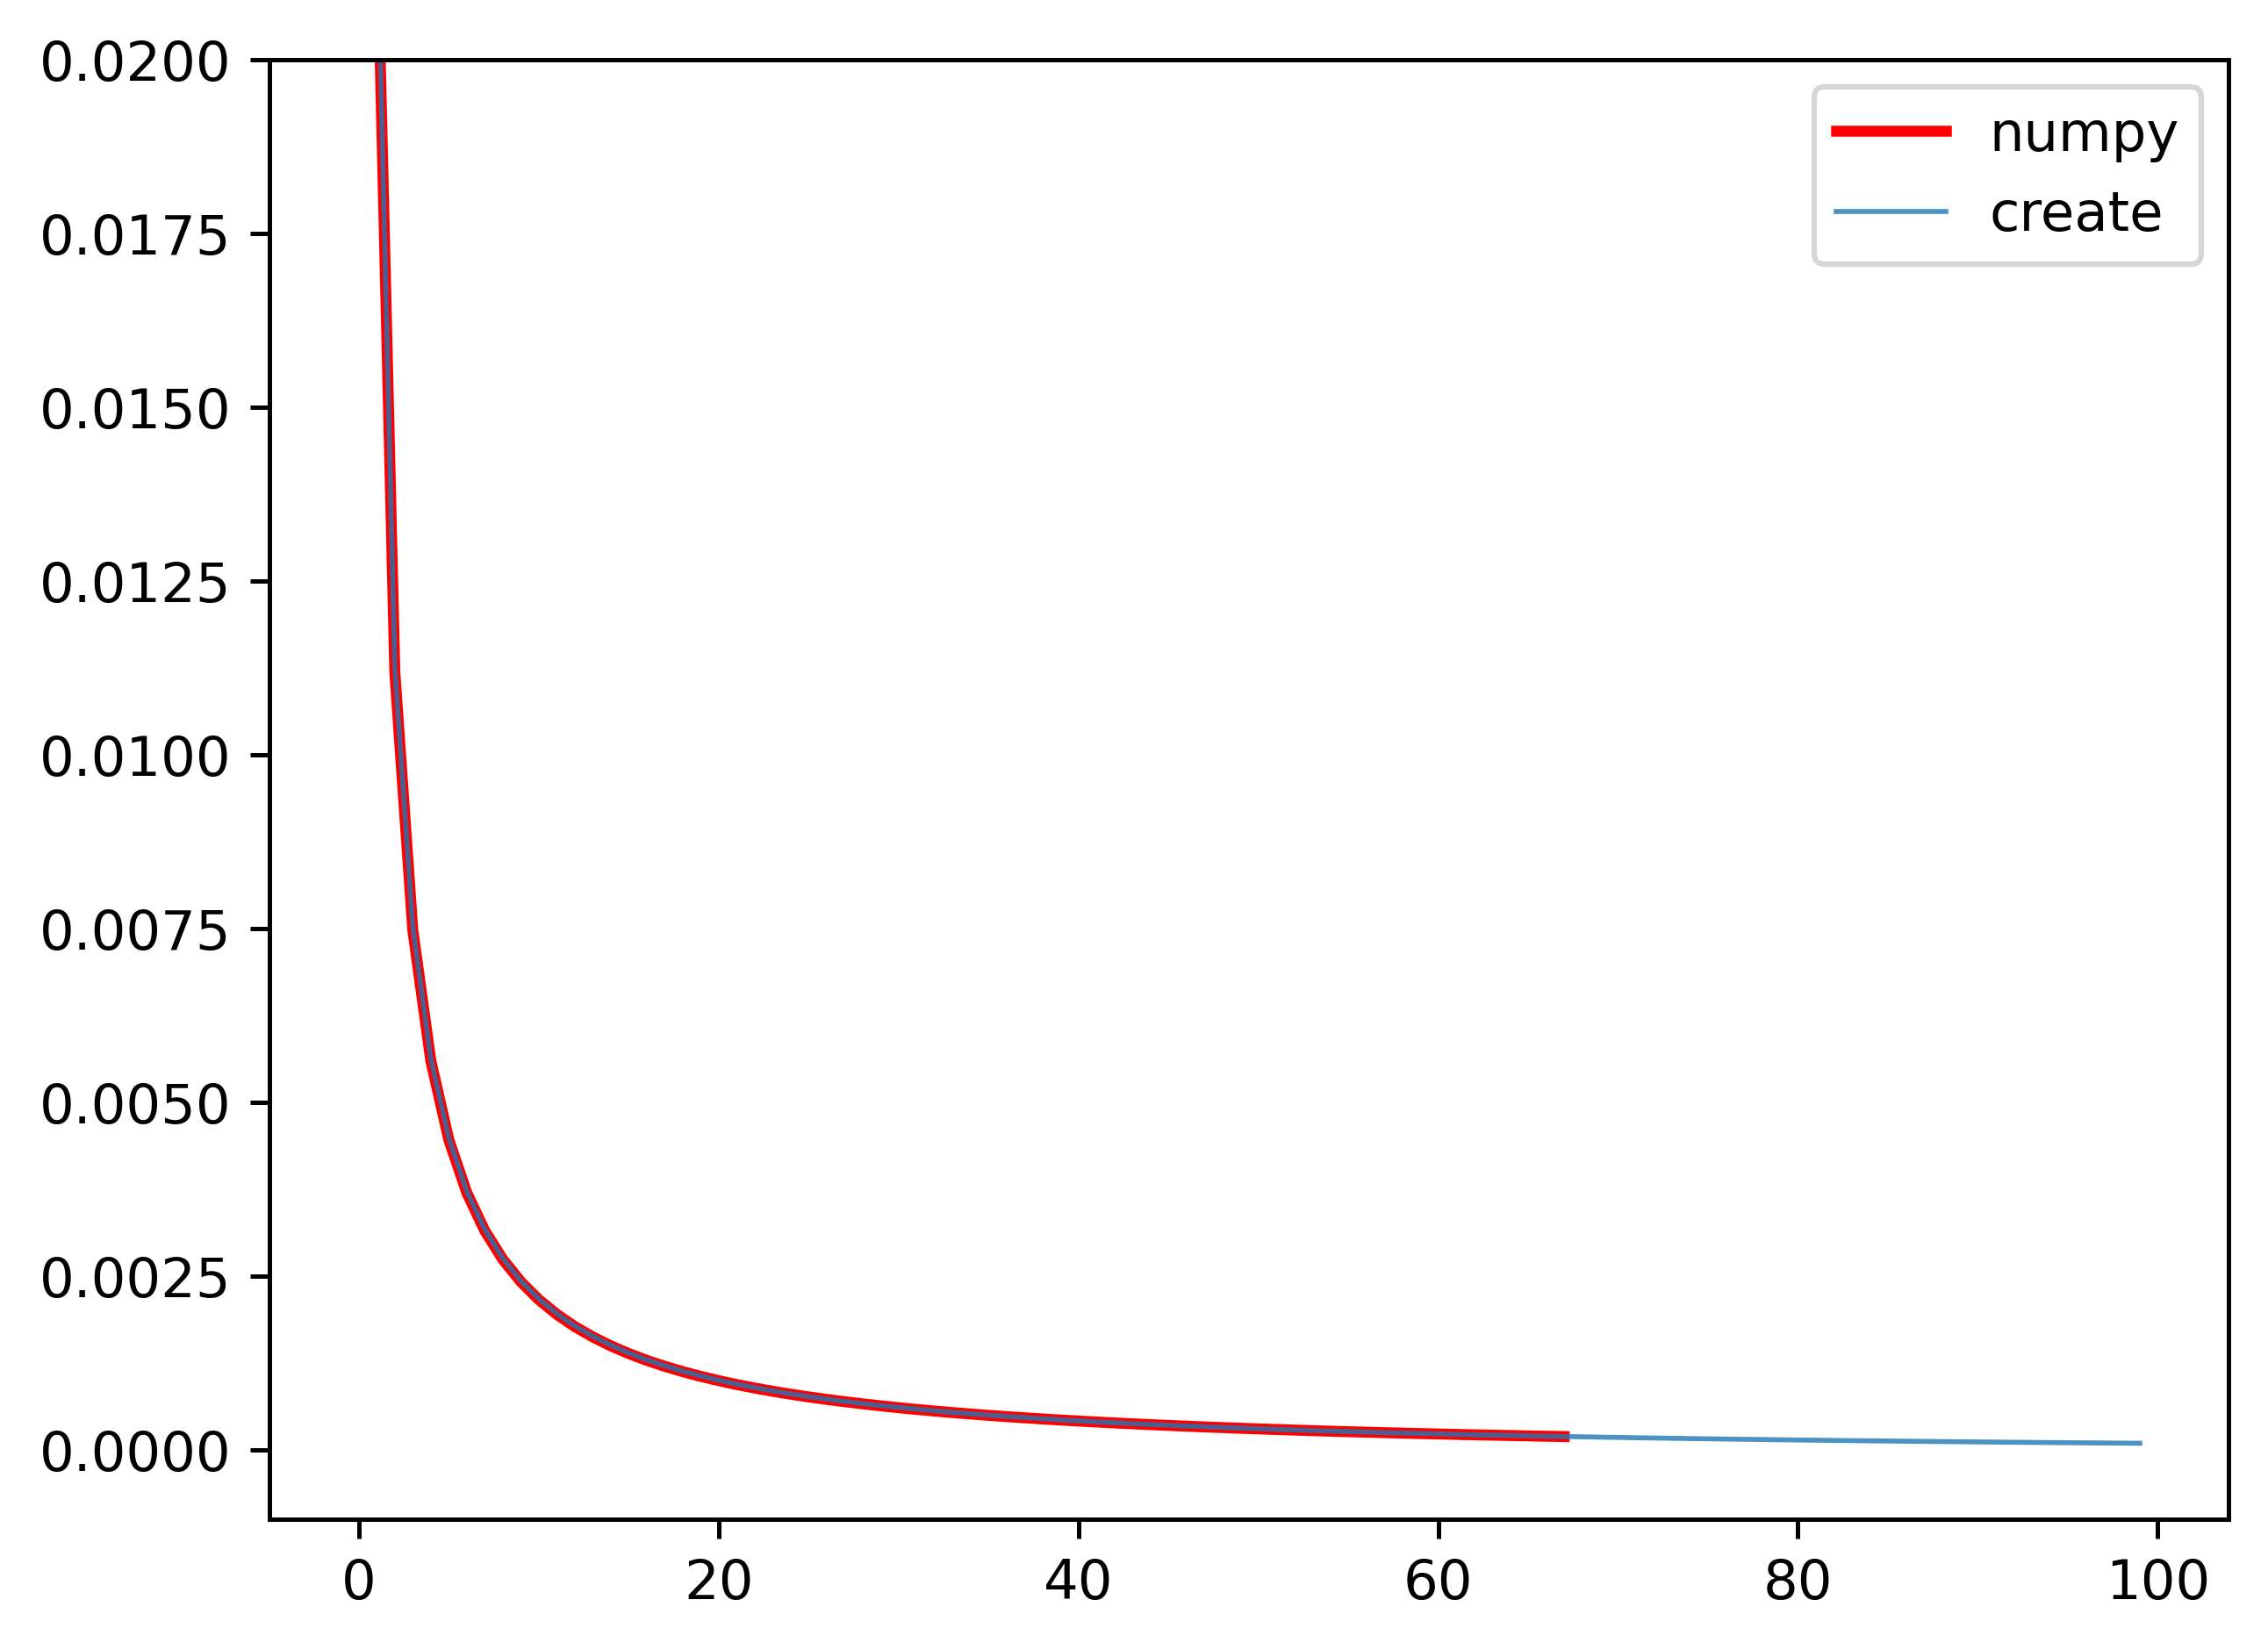

In [160]:
plt.figure(dpi=450)
plt.plot(x,pmf,label='numpy',color='red',lw=2)
plt.plot(np.arange(0,100,1),weights_n,label='create',alpha=0.8,lw=0.9)
plt.legend()
plt.ylim(-0.001,0.02)

In [134]:
# r, p = 5, 0.5  # number of successes and probability of success
x = np.arange(0, 100, 1)  # define the range of x values
pmf = SSA.nbinom.pmf(x, r, p)  # calculate the probability mass function

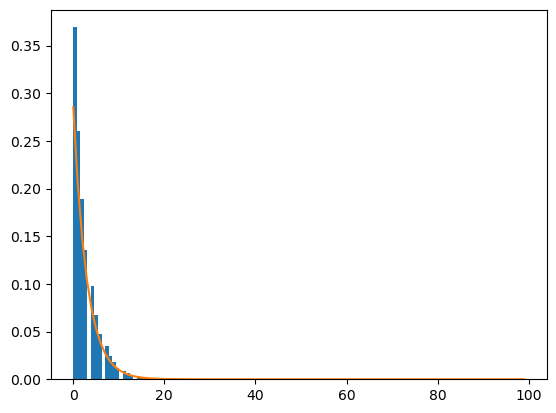

In [90]:
plt.hist(tt1, bins=40, density=True)
plt.plot(pmf)

In [133]:
# %%timeit
r = 50
p = r/(R0+r)
tt2 = np.random.default_rng().negative_binomial(r, p, 100000)

In [130]:
%%timeit
p = r/(R0+r)
tt3 = SSA.nbinom.rvs(r, p, size=100000, random_state=None)

6.32 ms ± 40.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


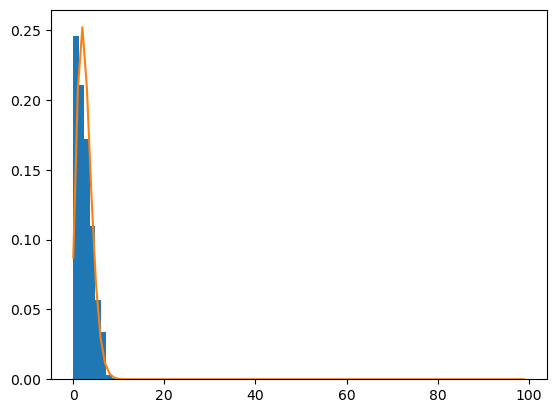

In [136]:
plt.hist(tt2, bins=10, density=True)
plt.plot(pmf)

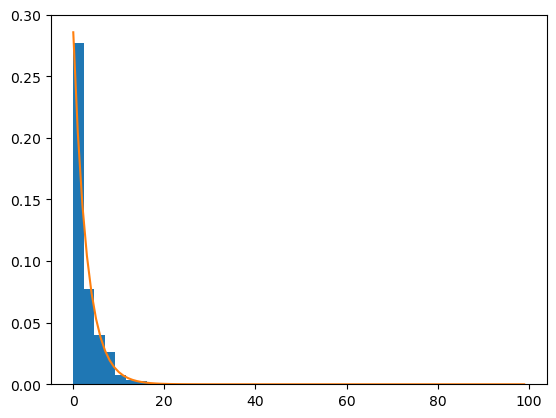

In [69]:
plt.hist(tt2, bins=20, density=True)
plt.plot(pmf)

In [100]:
import numpy as np
from scipy.stats import norm  # or whatever distribution you're using

# Create a SeedSequence
ss = np.random.SeedSequence(1234)

# Create a list to hold your random variates
random_variates = []

for _ in range(10):  # replace 10 with the number of simulations you want to run
    # Spawn a new Random Number Generator
    child_seeds = ss.spawn(1)
    rng = np.random.default_rng(child_seeds[0])
#     rng = np.random.default_rng(ss.spawn(1))

    # Generate random variates using this RNG
    rv = norm.rvs(size=100, random_state=rng)  # replace norm with your distribution
    random_variates.append(rv)

In [199]:
%load_ext memory_profiler

## gamma distribution

In [288]:
r = 20
R0 = 2.5
p = r/(R0+r)

In [63]:
Z = 3
Zb = 1
bb = torch.distributions.Gamma(torch.Tensor([Z]),torch.Tensor([Zb])).rsample(sample_shape=torch.Size([100000]))
hh3 = SSA.gamma.rvs(a=Z, loc=0, scale=Zb, size=100000, random_state=None)

h = np.arange(SSA.gamma.ppf(0.01, a=Z, loc=0, scale=Zb),
              SSA.gamma.ppf(0.99, a=Z, loc=0, scale=Zb))  # define the range of x values
pmf = SSA.gamma.pdf(x, a=Z, loc=0, scale=Zb)  # calculate the probability mass function
hh2 = np.random.gamma(Z, Zb, 100000)

In [72]:
hh4 = np.zeros(100000)
for i in range(100000):
    hh4[i] = SSA.gamma.rvs(a=Z, loc=0, scale=Zb, size=1, random_state=None)[0]

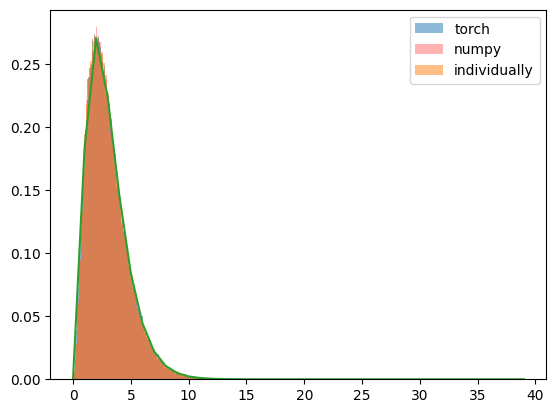

In [75]:
plt.hist(np.array(bb),density=True,bins=aa.max().int(),label='torch',alpha=0.5)
# plt.hist(hh3,density=True,alpha=0.5,bins=np.max(tt3),label='ssa')
plt.hist(hh2,density=True,alpha=0.3,bins=np.max(tt1),label='numpy',color='red')
plt.hist(hh4,density=True,alpha=0.5,bins=np.max(tt1),label='individually')
plt.plot(pmf)
plt.legend()
# plt.xlim((-1,10))

## check the weights sample from mobility

In [78]:
w = np.array([0.9,0.1,0.05,0.15])
w = w/np.sum(w)

In [87]:
w

array([0.75      , 0.08333333, 0.04166667, 0.125     ])

In [114]:
sample_ind = np.zeros(10000)
for i in range(10000):
    sample_ind[i] = np.random.choice(range(1,5),p=w)

In [115]:
w_sample = np.zeros_like(w)
for x in range(1,5):
    w_sample[x-1] = np.count_nonzero(sample_ind==x)

In [116]:
w_sample

array([7506.,  874.,  409., 1211.])

In [118]:
w*10000

array([7500.        ,  833.33333333,  416.66666667, 1250.        ])

In [119]:
immu = np.array([0.9,1,0.7])
infector = np.array([2,10,3])

In [125]:
immu = np.repeat(immu,infector)

In [121]:
R0 = 2.5
r = 0.1
r/(R0+r)

0.038461538461538464

In [127]:
SSA.nbinom(r,r/(R0+r),immu)